In [11]:
import torch
from model import Model
from plot_utils import plot_forward, plot_dataset
from notebook_utils import Args
from dataset import prepare_data
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
import seaborn as sns

In [2]:
args = Args(timesteps=100, batch=4, unet_version=0, scale_down=True)
device = "cuda:0" if torch.cuda.is_available () else 'cpu'

In [3]:
train_dataloader, dataset = prepare_data (args.dataset_path, args.batch,resize=args.scale_down, return_dataset=True)
model = Model (None, args.timesteps)

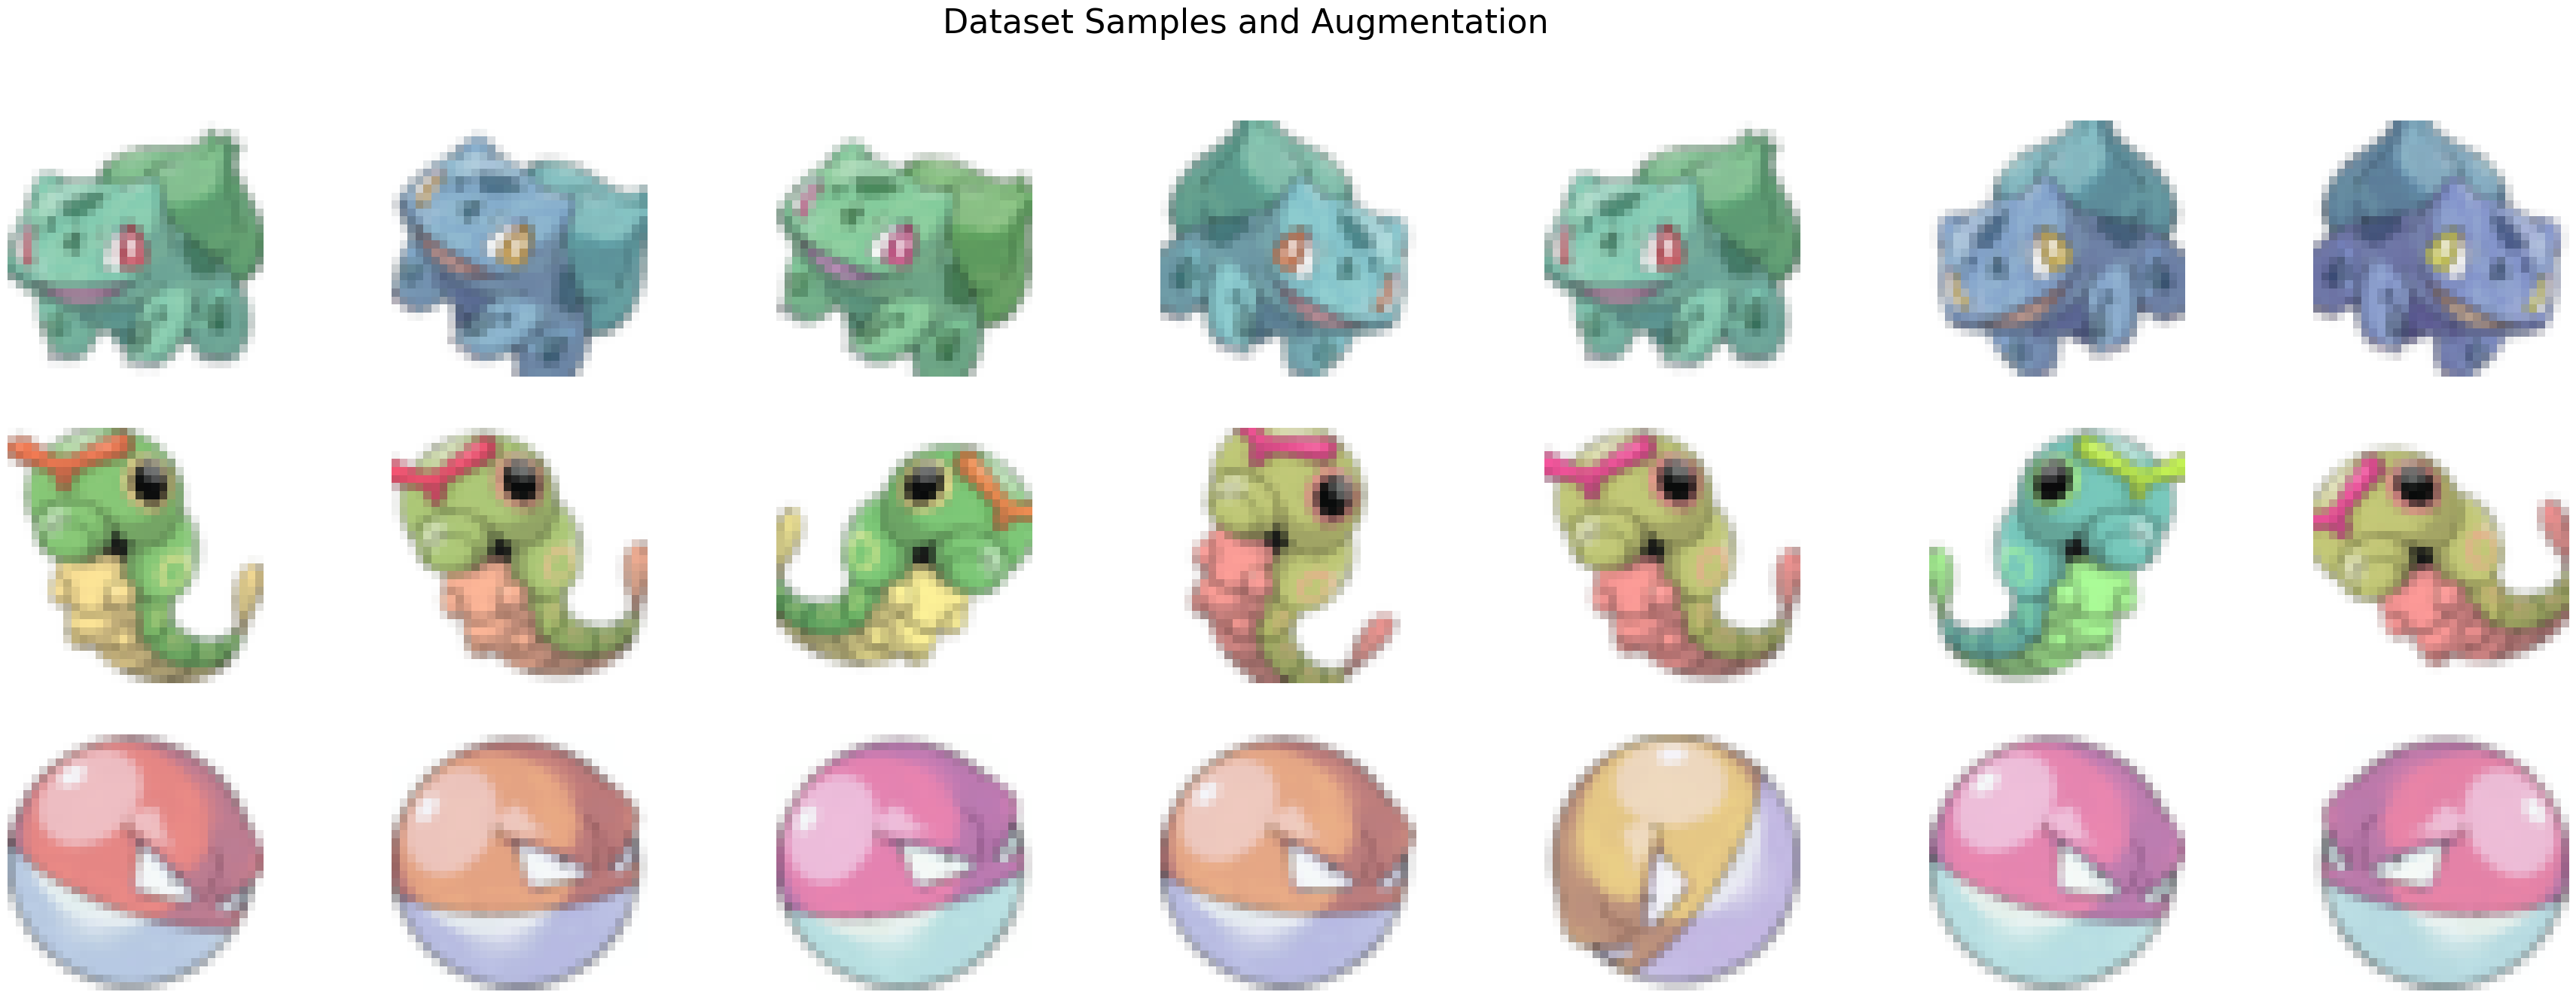

In [6]:
plot_dataset(dataset)

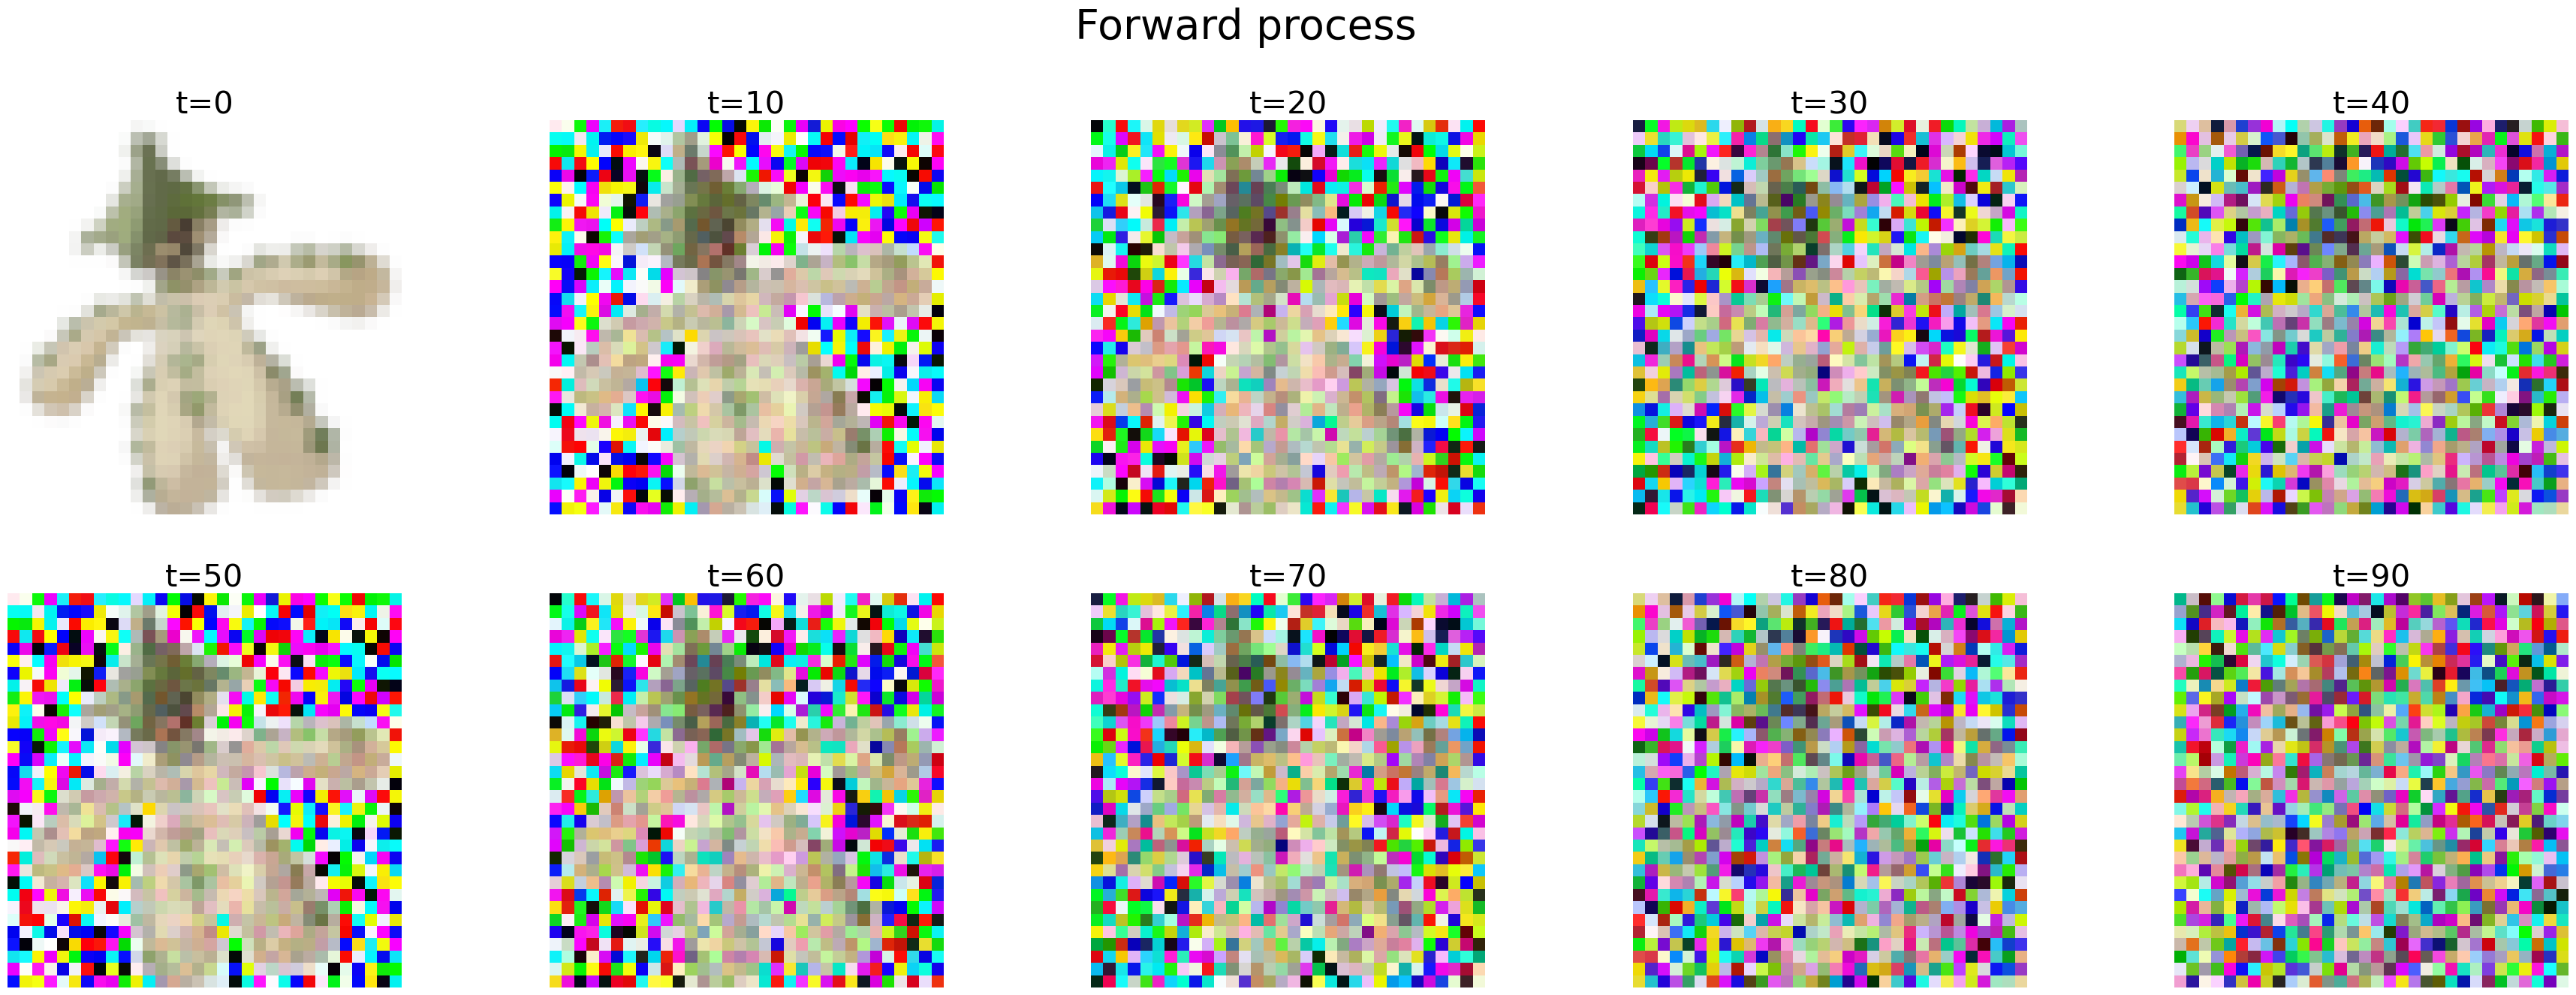

In [7]:

timesteps = torch.linspace (10, 90, 9).long ()
img = next (iter (train_dataloader))
forward = [img]
for t in timesteps:
    forward.append (model.forward_sample (img, t.reshape (1)))
plot_forward(forward)

In [14]:
# Create giant tensor with all images.
img_num = len(dataset)
tensor_with_all_images = torch.zeros((img_num, 3, 32, 32))
for i, img in enumerate(dataset):
  noisy = model.forward_sample(img, torch.tensor(args.timesteps-1))
  tensor_with_all_images[i,:,:,:] = noisy

# Save the pixel values of all images in 1D tensor for each channel. 
pixels_red = tensor_with_all_images[:,0,:,:].flatten().numpy()
pixels_green = tensor_with_all_images[:,1,:,:].flatten().numpy()
pixels_blue = tensor_with_all_images[:,2,:,:].flatten().numpy()

AttributeError: 'Args' object has no attribute 'timestep'

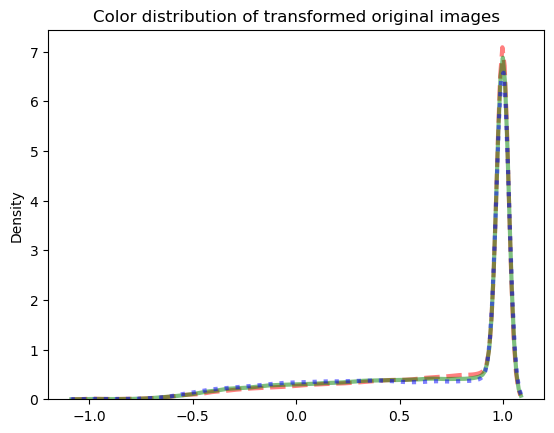

In [12]:
ax = sns.kdeplot(pixels_red, color="red", alpha=0.5, ls="--", lw=3)
sns.kdeplot(pixels_green, color="green", ax=ax, alpha=0.5, lw=3)
sns.kdeplot(pixels_blue, color="blue", ax=ax, alpha=0.5, ls=":", lw=3)
plt.title("Color distribution of transformed original images")
plt.savefig('color_distribution_original_images.png', dpi=300, bbox_inches='tight')